<a href="https://colab.research.google.com/github/haripranesh1505/Feynn_Lab_Market_Segmentation/blob/main/Feynn_Labs_EV_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('/content/EV_CARS _INDIA.csv')

In [66]:
df

,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.40,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.40,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.00,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.20,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.00,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14
5,Hyudai Kona Electric,39.20,9.7,155,452,103,395,Automatic,5,7,Yes,FWD,24
6,Jaguar I-Pace,90.00,4.8,200,470,294,696,Automatic,5,13,Yes,AWD,112
7,Mahindra eVerito,21.20,11.2,86,140,33,91,Automatic,5,12,Yes,FWD,10
8,MG ZS EV,44.50,8.5,120,340,107,353,Automatic,5,8,Yes,FWD,25
9,Mercedes Benz EQC,80.00,5.1,180,414,304,760,Automatic,5,21,Yes,AWD,100


In [100]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

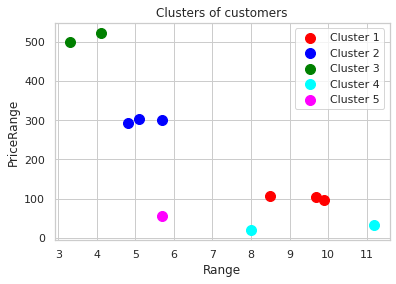

In [101]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Range')
plt.ylabel('PriceRange')
plt.legend()
plt.show()

In [102]:
df.isnull().sum()

Brand Name               0
Battery Capacity(kWh)    0
Acceleration(sec)        0
TopSpeed(km/h)           0
Range(km)                0
Max Power(kW)            0
Max Torque(Nm)           0
Transmission             0
No. of Seats             0
Charging T(h)            0
No. of Airbags           0
Drive Type               0
Price(Lh)                0
dtype: int64

In [103]:
df.columns

Index(['Brand Name', 'Battery Capacity(kWh)', 'Acceleration(sec)',
       'TopSpeed(km/h)', 'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)',
       'Transmission', 'No. of Seats', 'Charging T(h)', 'No. of Airbags',
       'Drive Type', 'Price(Lh)'],
      dtype='object')

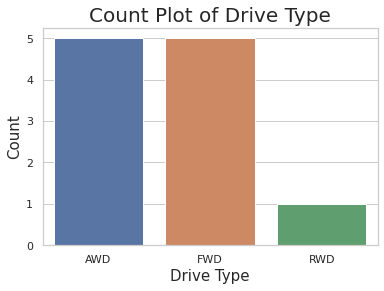

In [104]:
def power_train(dataframe): 
    sns.countplot(x= dataframe['Drive Type'])
    plt.title('Count Plot of Drive Type', fontsize = 20)
    plt.xlabel('Drive Type', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
power_train(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


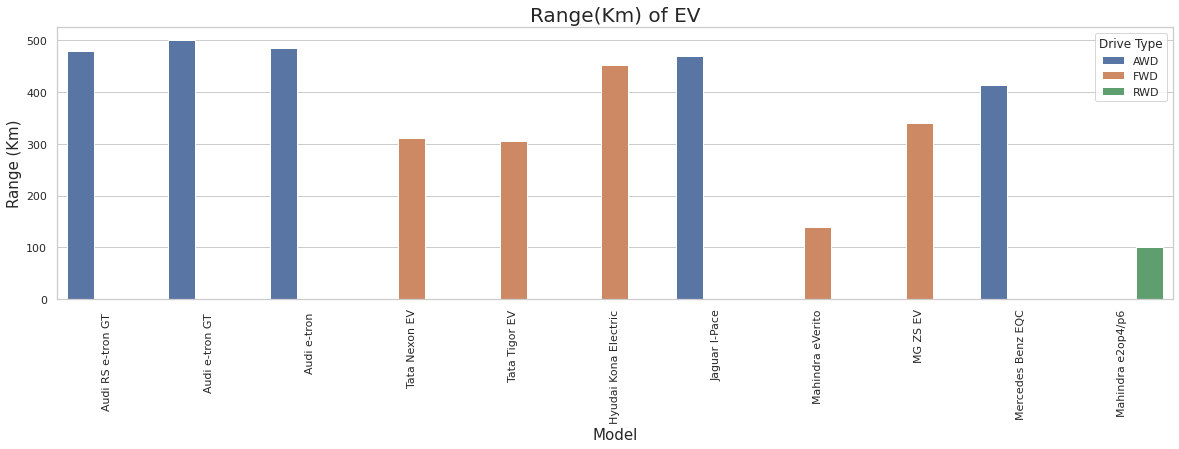

In [105]:
df['FullName'] = df['Brand Name']
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot('FullName', 'Range(km)' , data = df, hue = df['Drive Type'])
plt.title('''Range(Km) of EV''', fontsize = 20)
plt.ylabel('Range (Km)', fontsize= 15)
plt.xlabel('Model', fontsize= 15)
plt.xticks(rotation = 90)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


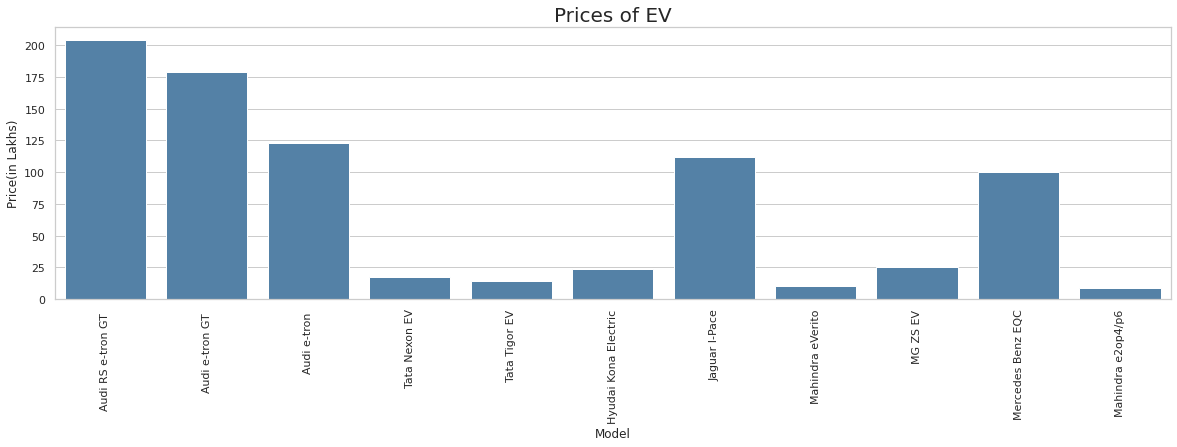

In [106]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot('FullName', 'Price(Lh)', data = df, color= 'steelblue')
plt.title('''Prices of EV''', fontsize= 20)
plt.ylabel('Price(in Lakhs)')
plt.xlabel('Model')
plt.xticks(rotation = 90)
plt.show()

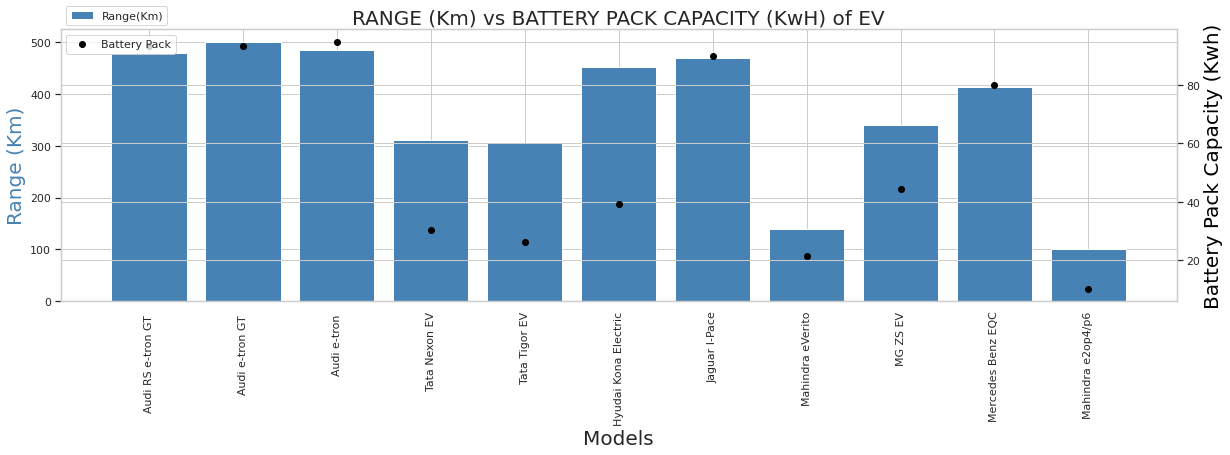

In [107]:
fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot()
ax1.bar(df['FullName'], df['Range(km)'],label= 'Range(Km)', color= 'steelblue')
plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
ax2 = ax1.twinx()
ax2.scatter(df['FullName'], df['Battery Capacity(kWh)'], label= 'Battery Pack', color = 'black')
plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV''', fontsize= 20)
ax1.set_xlabel('Models', size = 20)
ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
ax1.set_xticklabels(df['FullName'], rotation = 'vertical')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


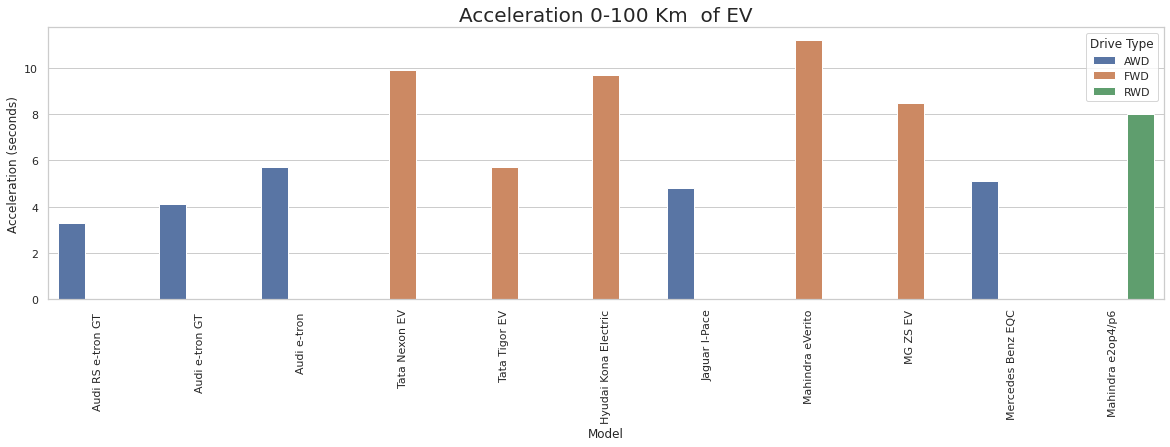

In [108]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot('FullName', 'Acceleration(sec)', data = df, hue = df['Drive Type'])
plt.title('''Acceleration 0-100 Km  of EV''', fontsize= 20)
plt.ylabel('Acceleration (seconds)')
plt.xlabel('Model')
plt.xticks(rotation = 90)
plt.show()

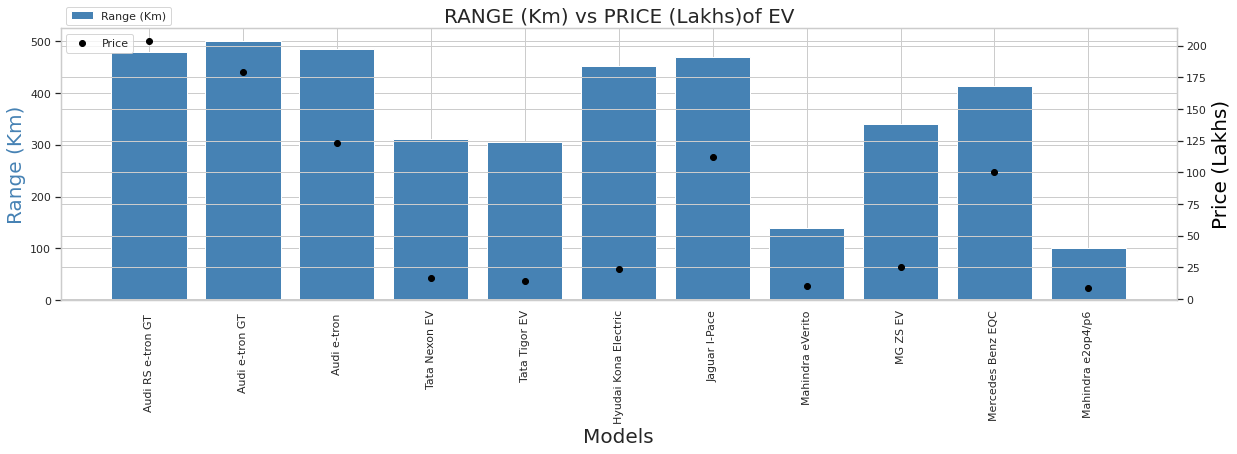

In [109]:
fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot()
ax1.bar(df['FullName'], df['Range(km)'],label= 'Range (Km)', color= 'steelblue')
plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
ax2 = ax1.twinx()
ax2.scatter(df['FullName'], df['Price(Lh)'], label= 'Price', color = 'black')
plt.title('''RANGE (Km) vs PRICE (Lakhs)of EV''', fontsize= 20)
ax1.set_xlabel('Models', size = 20)
ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
ax2.set_ylabel('Price (Lakhs)', color= 'black', size= 20)
plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
ax1.set_xticklabels(df['FullName'], rotation = 'vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


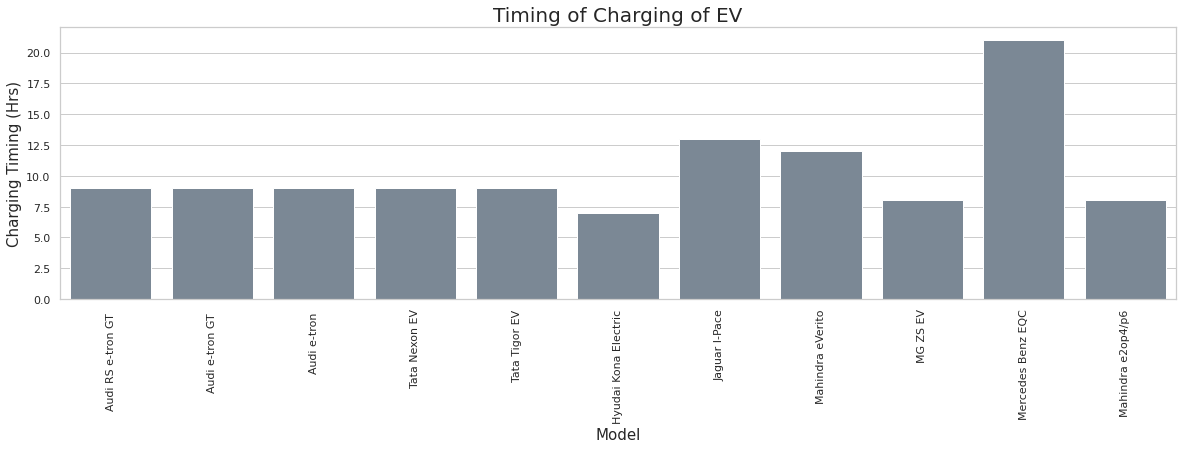

In [110]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot('FullName', 'Charging T(h)' , data = df, color = 'lightslategrey')
plt.title('''Timing of Charging of EV''', fontsize = 20)
plt.ylabel('Charging Timing (Hrs)', fontsize= 15)
plt.xlabel('Model', fontsize= 15)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


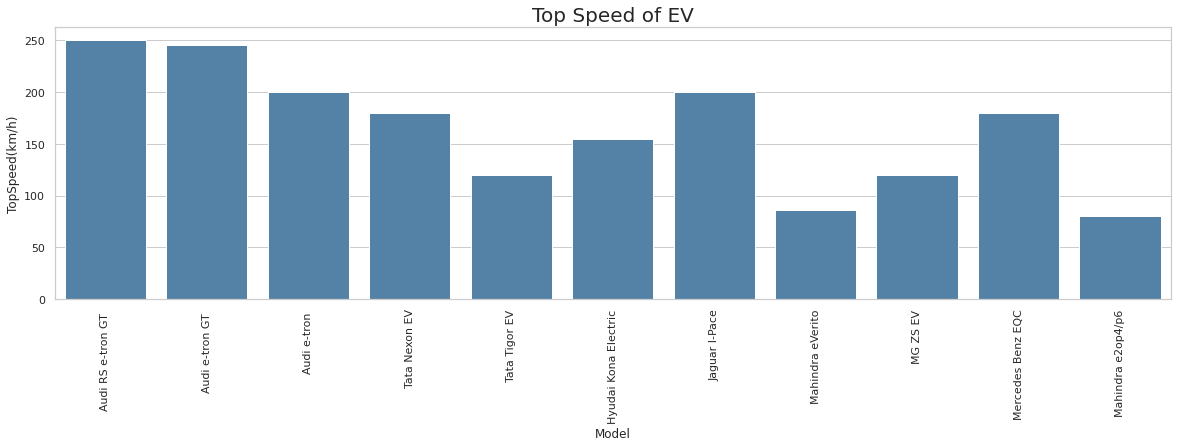

In [111]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot('FullName', 'TopSpeed(km/h)', data = df,color= 'steelblue')
plt.title('''Top Speed of EV''', fontsize= 20)
plt.ylabel('TopSpeed(km/h)')
plt.xlabel('Model')
plt.xticks(rotation = 90)
plt.show()